In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
# Dataset can be downloaded from:
# http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv
df = pd.read_csv("Advertising.csv", index_col=0)

In [3]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


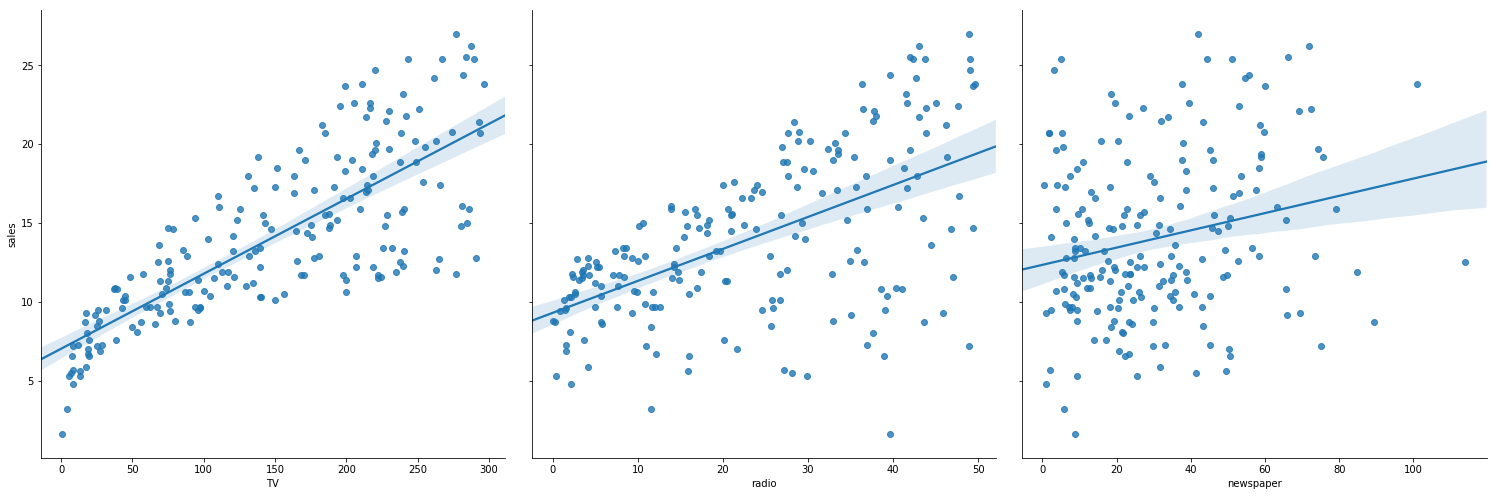

In [6]:
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars=['sales'], size=7, kind='reg')

In [7]:
# http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [8]:
X = df.iloc[:, :3]
print(X.shape)

(200, 3)


In [9]:
Y = df.iloc[:, 3]
print(Y.shape)

(200,)


In [10]:
# from http://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [11]:
# Print training and testing dimension
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(150, 3) (50, 3)
(150,) (50,)


In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
y_pred = lr.predict(X_test)

In [15]:
lr.score(X_test, y_test)

0.86547851211765

In [16]:
# http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

3.6080820774711877

In [ ]:
# https://github.com/EpistasisLab/tpot
# TPOT supports regression too!
    
from tpot import TPOTRegressor
tpot = TPOTRegressor(verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))